In [1]:
import pandas as pd

## 과제 1: Datetime Basics

In [2]:
transactions = pd.read_csv('./data/retail/transactions.csv', parse_dates=['date'])
transactions.head()

,date,store_nbr,transactions
0,2013-01-01,25,770
1,2013-01-02,1,2111
2,2013-01-02,2,2358
3,2013-01-02,3,3487
4,2013-01-02,4,1922


In [3]:
transactions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 83488 entries, 0 to 83487
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   date          83488 non-null  datetime64[ns]
 1   store_nbr     83488 non-null  int64         
 2   transactions  83488 non-null  int64         
dtypes: datetime64[ns](1), int64(2)
memory usage: 1.9 MB


In [4]:
transactions['date'].max()

Timestamp('2017-08-15 00:00:00')

In [5]:
# Difference between date and max-date
transactions['time_to_last_date'] = transactions['date'].max() - transactions['date']

# Dateparts
transactions['year'] = transactions['date'].dt.year
transactions['month'] = transactions['date'].dt.month
# 월요일(0), 일요일(6)
transactions['day_of_week'] = transactions['date'].dt.weekday

# Format Date
transactions['date'] = transactions['date'].dt.strftime('%Y-%B-%d')

transactions.head()

,date,store_nbr,transactions,time_to_last_date,year,month,day_of_week
0,2013-January-01,25,770,1687 days,2013,1,1
1,2013-January-02,1,2111,1686 days,2013,1,2
2,2013-January-02,2,2358,1686 days,2013,1,2
3,2013-January-02,3,3487,1686 days,2013,1,2
4,2013-January-02,4,1922,1686 days,2013,1,2


## 과제 2: Time Delta

In [6]:
transactions.head()

,date,store_nbr,transactions,time_to_last_date,year,month,day_of_week
0,2013-January-01,25,770,1687 days,2013,1,1
1,2013-January-02,1,2111,1686 days,2013,1,2
2,2013-January-02,2,2358,1686 days,2013,1,2
3,2013-January-02,3,3487,1686 days,2013,1,2
4,2013-January-02,4,1922,1686 days,2013,1,2


In [7]:
transactions.assign(
    time_to_last_date=pd.to_timedelta(3, unit='W') + transactions['time_to_last_date'],
    weeks_to_last_date=(lambda x: x['time_to_last_date'].dt.days / 7)
).head()

,date,store_nbr,transactions,time_to_last_date,year,month,day_of_week,weeks_to_last_date
0,2013-January-01,25,770,1708 days,2013,1,1,244.000000
1,2013-January-02,1,2111,1707 days,2013,1,2,243.857143
2,2013-January-02,2,2358,1707 days,2013,1,2,243.857143
3,2013-January-02,3,3487,1707 days,2013,1,2,243.857143
4,2013-January-02,4,1922,1707 days,2013,1,2,243.857143


## 과제 3: Time Series 결측값

In [8]:
oil = pd.read_csv('./data/retail/oil.csv', index_col='date', parse_dates=True)
oil.head()

,dcoilwtico
date,
2013-01-01,NaN
2013-01-02,93.14
2013-01-03,92.97
2013-01-04,93.12
2013-01-07,93.20


In [9]:
oil.index.dtype

dtype('<M8[ns]')

In [10]:
oil.mean()

dcoilwtico    67.714366
dtype: float64

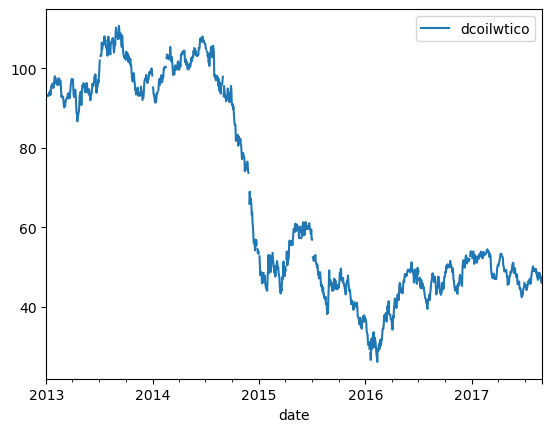

In [11]:
oil.plot();

In [12]:
print(
    oil.ffill().mean(),
    oil.bfill().mean(),
    oil.interpolate().mean()
)

dcoilwtico    67.671249
dtype: float64 dcoilwtico    67.673325
dtype: float64 dcoilwtico    67.661824
dtype: float64


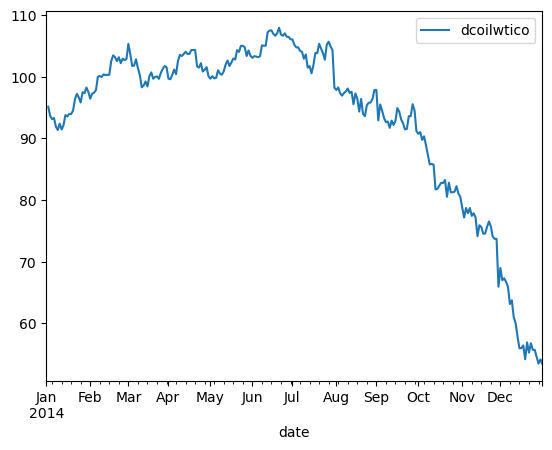

In [13]:
oil.loc['2014'].ffill().plot();

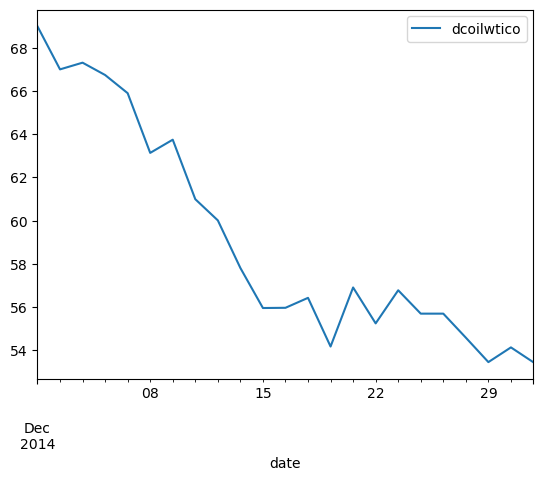

In [14]:
oil.loc['2014-12'].ffill().plot();

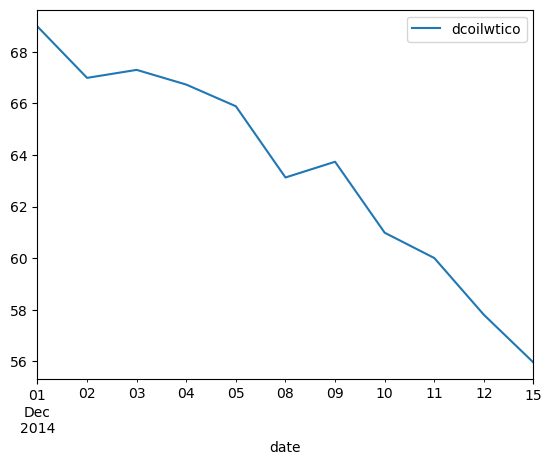

In [15]:
oil.loc['2014-12-01':'2014-12-15'].ffill().plot();